In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
data = keras.datasets.imdb

In [3]:
max_words = 10000

In [4]:
(x_train, y_train), (x_test, y_test) = data.load_data(num_words = max_words)

e:\miniconda\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
e:\miniconda\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
x_train.shape, y_train.shape

((25000,), (25000,))

In [6]:
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

#文本训练成密集向量

In [7]:
[len(x) for x in x_train]

[218,
 189,
 141,
 550,
 147,
 43,
 123,
 562,
 233,
 130,
 450,
 99,
 117,
 238,
 109,
 129,
 163,
 752,
 212,
 177,
 129,
 140,
 256,
 888,
 93,
 142,
 220,
 193,
 171,
 221,
 174,
 647,
 233,
 162,
 597,
 234,
 51,
 336,
 139,
 231,
 704,
 142,
 861,
 132,
 122,
 570,
 55,
 214,
 103,
 186,
 113,
 169,
 469,
 138,
 302,
 766,
 351,
 146,
 59,
 206,
 107,
 152,
 186,
 431,
 147,
 684,
 383,
 324,
 252,
 263,
 787,
 211,
 314,
 118,
 390,
 132,
 710,
 306,
 167,
 115,
 95,
 158,
 156,
 82,
 502,
 314,
 190,
 174,
 60,
 145,
 214,
 659,
 408,
 515,
 461,
 202,
 238,
 170,
 107,
 171,
 158,
 145,
 790,
 258,
 287,
 67,
 123,
 975,
 775,
 236,
 195,
 274,
 214,
 91,
 1038,
 815,
 183,
 206,
 50,
 118,
 147,
 141,
 60,
 56,
 439,
 439,
 213,
 144,
 533,
 303,
 203,
 563,
 129,
 153,
 55,
 92,
 174,
 187,
 183,
 165,
 78,
 198,
 156,
 223,
 127,
 61,
 362,
 84,
 57,
 176,
 159,
 57,
 159,
 165,
 213,
 194,
 149,
 130,
 203,
 19,
 98,
 466,
 525,
 130,
 322,
 153,
 408,
 215,
 472,
 143,
 1

In [8]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, 300)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, 300)

In [9]:
[len(x) for x in x_train]

[300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300,
 300

In [10]:
y_train

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [11]:
test = 'i am a student'

In [12]:
test.split()

['i', 'am', 'a', 'student']

In [13]:
['i', 'am', 'a', 'student'].index('am')

1

In [14]:
dict((word, test.split().index(word)) for word in test.split())

{'i': 0, 'am': 1, 'a': 2, 'student': 3}

In [15]:
model = keras.models.Sequential()

In [16]:
model.add(layers.Embedding(10000, 50 , input_length = 300))

#(none, 300, 50)

In [17]:
#用这个代替flatten，用长度为300的数据变成为1。
model.add(layers.GlobalAveragePooling1D())

In [18]:
x_train.shape

(25000, 300)

2500, 300, 50

In [19]:
#model.add(layers.Flatten())

In [20]:
'''
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
'''

"\nmodel.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)))\nmodel.add(layers.Dropout(0.5))\n"

In [21]:
model.add(layers.Dense(12, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

In [22]:
model.add(layers.Dropout(0.5))

In [23]:
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 50)           500000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 12)                612       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 500,625
Trainable params: 500,625
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [26]:
history = model.fit(x_train, y_train, epochs = 15, batch_size = 256, validation_data = (x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 8s 300us/sample - loss: 0.7001 - acc: 0.5475 - val_loss: 0.6866 - val_acc: 0.6221
Epoch 2/15
25000/25000 [==============================] - 5s 190us/sample - loss: 0.6586 - acc: 0.6812 - val_loss: 0.6240 - val_acc: 0.7110
Epoch 3/15
25000/25000 [==============================] - 5s 190us/sample - loss: 0.5886 - acc: 0.7993 - val_loss: 0.5552 - val_acc: 0.8182
Epoch 4/15
25000/25000 [==============================] - 5s 190us/sample - loss: 0.5287 - acc: 0.8522 - val_loss: 0.5102 - val_acc: 0.8528
Epoch 5/15
25000/25000 [==============================] - 5s 188us/sample - loss: 0.4875 - acc: 0.8724 - val_loss: 0.4796 - val_acc: 0.8712
Epoch 6/15
25000/25000 [==============================] - 5s 189us/sample - loss: 0.4543 - acc: 0.8873 - val_loss: 0.4548 - val_acc: 0.8648os
Epoch 7/15
25000/25000 [==============================] - 5s 188us/sample - loss: 0.4287 - acc: 0.8967 - val

In [27]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

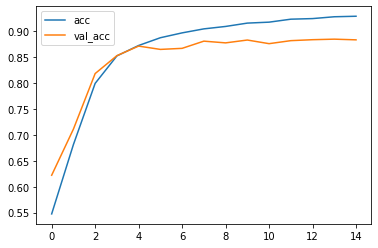

In [28]:
plt.plot(history.epoch, history.history.get('acc'), label = 'acc')
plt.plot(history.epoch, history.history.get('val_acc'), label = 'val_acc')
plt.legend()

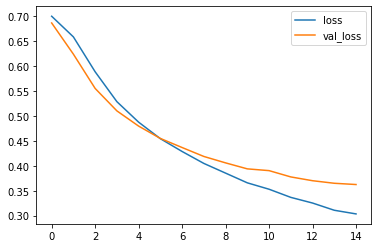

In [29]:
plt.plot(history.epoch, history.history.get('loss'), label = 'loss')
plt.plot(history.epoch, history.history.get('val_loss'), label = 'val_loss')
plt.legend()

#解决过拟合问题： 1. Dropout 2.正则化L1、L2